In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import numpy as np
from joblib import load
import matplotlib.pyplot as plt
import cv2

In [0]:
# Load Models Dataset
categories = ["ct", "tr"]

csgo_models_dataset = load("data_set")

x_train = []
y_train = []

for x,y in csgo_models_dataset:
    x_train.append(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))
    y_train.append([y])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [33]:
#Show Dataset Shape 
print("x_train = ",x_train.shape)
print("y_train = ",y_train.shape)

x_train =  (333, 50, 50, 3)
y_train =  (333, 1)


image label:  ct


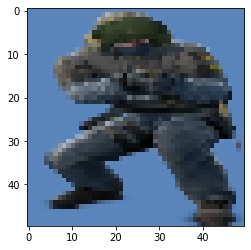

In [49]:
#Show image sample
sample_index = 0
print("image label: ",categories[y_train[sample_index][0]])
img = plt.imshow(x_train[sample_index])

In [52]:
#One-Hot Encoding
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot[:4])

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [0]:
#Normalize pixels in the images
x_train = x_train / 255

In [0]:
#Build the CNN
model = Sequential()
model.add( Conv2D(32, (5,5), activation="relu", input_shape = (50, 50, 3)) )
model.add( MaxPooling2D(pool_size=(2,2)) )
model.add( Conv2D(32, (5,5), activation="relu") )
model.add( MaxPooling2D(pool_size=(2,2)) )
model.add( Flatten() )
model.add( Dense(1000, activation="relu") )
model.add( Dense(2, activation="softmax") )

In [0]:
#Compile Model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [60]:
#Train the Model
hist = model.fit(x_train, y_train_one_hot, batch_size=333, epochs=10, validation_split=0.3)

Train on 233 samples, validate on 100 samples
Epoch 1/10
233/233 [==============================] - 0s 206us/step - loss: 0.6237 - acc: 0.7210 - val_loss: 0.6080 - val_acc: 0.7700
Epoch 2/10
233/233 [==============================] - 0s 154us/step - loss: 0.5994 - acc: 0.7597 - val_loss: 0.5914 - val_acc: 0.7500
Epoch 3/10
233/233 [==============================] - 0s 159us/step - loss: 0.5774 - acc: 0.7382 - val_loss: 0.5607 - val_acc: 0.7700
Epoch 4/10
233/233 [==============================] - 0s 157us/step - loss: 0.5474 - acc: 0.8155 - val_loss: 0.5353 - val_acc: 0.7800
Epoch 5/10
233/233 [==============================] - 0s 167us/step - loss: 0.5143 - acc: 0.8498 - val_loss: 0.5220 - val_acc: 0.8300
Epoch 6/10
233/233 [==============================] - 0s 156us/step - loss: 0.4855 - acc: 0.8283 - val_loss: 0.5025 - val_acc: 0.7600
Epoch 7/10
233/233 [==============================] - 0s 154us/step - loss: 0.4649 - acc: 0.8326 - val_loss: 0.4994 - val_acc: 0.8000
Epoch 8/10
233/2

In [67]:
#Trying to predict something
index = 60

img = x_train[index]
print("image label: ",categories[y_train[index][0]])

model.predict(np.array([img,]))

image label:  tr


array([[0.07783789, 0.9221621 ]], dtype=float32)